# Simple Ten Node Cluster: Modeling with Compute tasks



In [1]:
using Random
using Agents
using HPCMod
using Plots
using DataFrames
using Dates

In [ ]:
"""
`function simulate(adaptive_fourth_user=false, thinktime_gamma=false)`

Master simulation function to simulate simple 10-node cluster.

* `adaptive_fourth_user` - should the 4th user use AdaptiveFactor strategy
* `thinktime_gamma` - should a gamma distribution used for think time between jobs of same task
"""
function simulate(
	;
	adaptive_fourth_user=false, 
	thinktime_gamma=false, 
	max_time_per_job=24*3, 
	all_adaptive=false,
	rng=Random.Xoshiro(123),
	arrive_same_time=true
	)
	# Init simulation, seed a random generator
	sim = SimulationSimple(;rng=rng)
	sim.workload_done_check_freq = 1
	# Add HPC resource
	add_resource!(
	    sim; 
	    nodes=10,
	    max_nodes_per_job=6,
	    max_time_per_job,
	    scheduler_backfill=true)
	
	# add four users
	for user_id in 1:4
	    user = UserSimple(
	        sim;
	        max_concurrent_tasks=2
	        )
		if thinktime_gamma
	    	user.thinktime_generator=generate_thinktime_gamma
		end

		adaptive_user = false
		if adaptive_fourth_user && user_id==4
			adaptive_user = true
		end

		if all_adaptive
			adaptive_user = true
		end
		
	    for m_task_id in 1:1
	        CompTask(sim, user.id;
	            task_split_schema = adaptive_user ? AdaptiveFactor : UserPreferred,
	            submit_time= arrive_same_time ? 1 : user_id+m_task_id,
	            nodetime=140, nodes_prefered=4, walltime_prefered=48)
	    end
	end
	
	run!(sim; run_till_no_jobs=true);
	
	sim
end;


In [3]:
# Base simulation
base = simulate(adaptive_fourth_user=false, thinktime_gamma=false);
# Reduce max_time_per_job to 24 hours 
base24 = simulate(adaptive_fourth_user=false, thinktime_gamma=false, max_time_per_job=24);

adaptive = simulate(adaptive_fourth_user=true, thinktime_gamma=false);
adaptive_gamma = simulate(adaptive_fourth_user=true, thinktime_gamma=true);
adaptive_gamma2 = simulate(adaptive_fourth_user=true, thinktime_gamma=true,rng=Random.Xoshiro(131));
adaptive_all = simulate(all_adaptive=true, thinktime_gamma=true);


BatchJobSimple(1, CompTask(1, 1, 140, 0, 0, 140, 1, 1, 36, UserPreferred, 1, 4, 48, Int64[], [1], 36), 4, 35, 1, 1, 36, HPCMod.FIFO, [1, 2, 3, 4])
BatchJobSimple(2, CompTask(3, 3, 140, 0, 0, 140, 1, 1, 36, UserPreferred, 1, 4, 48, Int64[], [2], 36), 4, 35, 1, 1, 36, HPCMod.FIFO, [5, 6, 7, 8])
BatchJobSimple(3, CompTask(4, 4, 140, 0, 0, 140, 1, 1, 71, UserPreferred, 1, 4, 48, Int64[], [3], 71), 4, 35, 1, 36, 71, HPCMod.FIFO, [1, 2, 3, 4])
BatchJobSimple(4, CompTask(2, 2, 140, 0, 0, 140, 1, 1, 71, UserPreferred, 1, 4, 48, Int64[], [4], 71), 4, 35, 1, 36, 71, HPCMod.FIFO, [5, 6, 7, 8])
BatchJobSimple(1, CompTask(1, 1, 140, 0, 0, 140, 1, 1, 60, UserPreferred, 1, 4, 48, Int64[], [1, 6], 60), 4, 24, 1, 1, 25, HPCMod.FIFO, [1, 2, 3, 4])
BatchJobSimple(2, CompTask(3, 3, 140, 0, 0, 140, 1, 1, 60, UserPreferred, 1, 4, 48, Int64[], [2, 5], 60), 4, 24, 1, 1, 25, HPCMod.FIFO, [5, 6, 7, 8])
BatchJobSimple(3, CompTask(4, 4, 140, 0, 0, 140, 1, 1, 71, UserPreferred, 1, 4, 48, Int64[], [3, 8], 71), 4, 2

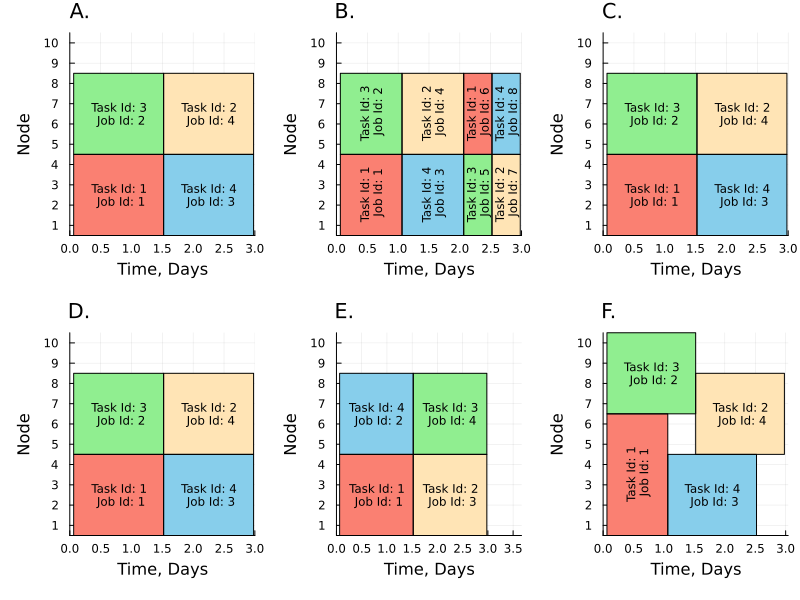

In [4]:

#plotly(ticks=:native)
#"A. Prefered User and no Think Time"
#"B. Prefered User and no Think Time, max allowed requested wall-time reduced to 24 hours"
#"C. Fourth Adaptive User and no Think Time"
#"D. Fourth Adaptive User and Gamma Distribution for Think Time"
annotation_pointsize=8
p1=plot_node_util(base, ticks_step=0.5, annotation_pointsize=annotation_pointsize)
title!("A.", titleloc=:left)
p2=plot_node_util(base24, ticks_step=0.5, annotation_pointsize=annotation_pointsize)
title!("B.", titleloc=:left)
p3=plot_node_util(adaptive, ticks_step=0.5, annotation_pointsize=annotation_pointsize)
title!("C.", titleloc=:left)
p4=plot_node_util(adaptive_gamma,ticks_step=0.5, annotation_pointsize=annotation_pointsize)
title!("D.", titleloc=:left)
p5=plot_node_util(adaptive_gamma2,ticks_step=0.5, annotation_pointsize=annotation_pointsize)
title!("E.", titleloc=:left)
p6=plot_node_util(adaptive_all,ticks_step=0.5, annotation_pointsize=annotation_pointsize)
title!("F.", titleloc=:left)

plot(p1,p2,p3,p4,p5,p6,layout = (2, 3),size=(800,600), colorbar = false, left_margin = 5Plots.mm, bottom_margin = 5Plots.mm)

BatchJobSimple(1, CompTask(1, 1, 140, 0, 0, 140, 1, 1, 60, UserPreferred, 1, 4, 48, Int64[], [1, 6], 60), 4, 24, 1, 1, 25, HPCMod.FIFO, [1, 2, 3, 4])
BatchJobSimple(2, CompTask(3, 3, 140, 0, 0, 140, 1, 1, 60, UserPreferred, 1, 4, 48, Int64[], [2, 5], 60), 4, 24, 1, 1, 25, HPCMod.FIFO, [5, 6, 7, 8])
BatchJobSimple(3, CompTask(4, 4, 140, 0, 0, 140, 1, 1, 71, UserPreferred, 1, 4, 48, Int64[], [3, 8], 71), 4, 24, 1, 25, 49, HPCMod.FIFO, [1, 2, 3, 4])
BatchJobSimple(4, CompTask(2, 2, 140, 0, 0, 140, 1, 1, 71, UserPreferred, 1, 4, 48, Int64[], [4, 7], 71), 4, 24, 1, 25, 49, HPCMod.FIFO, [5, 6, 7, 8])
BatchJobSimple(5, CompTask(3, 3, 140, 0, 0, 140, 1, 1, 60, UserPreferred, 1, 4, 48, Int64[], [2, 5], 60), 4, 11, 25, 49, 60, HPCMod.FIFO, [1, 2, 3, 4])
BatchJobSimple(6, CompTask(1, 1, 140, 0, 0, 140, 1, 1, 60, UserPreferred, 1, 4, 48, Int64[], [1, 6], 60), 4, 11, 25, 49, 60, HPCMod.FIFO, [5, 6, 7, 8])
BatchJobSimple(7, CompTask(2, 2, 140, 0, 0, 140, 1, 1, 71, UserPreferred, 1, 4, 48, Int64[], [

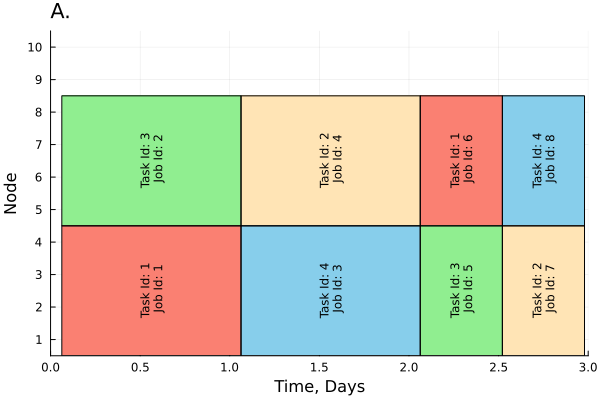

In [5]:

base_arrive_same_time = simulate(arrive_same_time=true, max_time_per_job=24);
adaptive_all_arrive_same_time = simulate(all_adaptive=true, arrive_same_time=true, thinktime_gamma=true, max_time_per_job=24);

p1=plot_node_util(base_arrive_same_time, ticks_step=0.5, annotation_pointsize=annotation_pointsize)
title!("A.", titleloc=:left)


BatchJobSimple(1, CompTask(1, 1, 140, 0, -4, 144, 1, 1, 26, AdaptiveFactor, 1, 4, 48, Int64[], [1], 26), 6, 24, 1, 1, 25, HPCMod.FIFO, [1, 2, 3, 4, 5, 6])
BatchJobSimple(2, CompTask(3, 3, 140, 0, -4, 144, 1, 1, 59, AdaptiveFactor, 1, 4, 48, Int64[], [2, 5], 59), 4, 24, 1, 1, 25, HPCMod.FIFO, [7, 8, 9, 10])
BatchJobSimple(3, CompTask(4, 4, 140, 0, -4, 144, 1, 1, 65, AdaptiveFactor, 1, 4, 48, Int64[], [3, 6], 65), 4, 24, 1, 25, 49, HPCMod.FIFO, [1, 2, 3, 4])
BatchJobSimple(4, CompTask(2, 2, 140, 0, 0, 140, 1, 1, 61, AdaptiveFactor, 1, 4, 48, Int64[], [4, 7], 61), 4, 24, 1, 25, 49, HPCMod.FIFO, [5, 6, 7, 8])
BatchJobSimple(5, CompTask(3, 3, 140, 0, -4, 144, 1, 1, 59, AdaptiveFactor, 1, 4, 48, Int64[], [2, 5], 59), 6, 8, 25, 49, 57, HPCMod.FIFO, [1, 2, 3, 4, 5, 6])
BatchJobSimple(6, CompTask(4, 4, 140, 0, -4, 144, 1, 1, 65, AdaptiveFactor, 1, 4, 48, Int64[], [3, 6], 65), 6, 8, 49, 57, 65, HPCMod.FIFO, [1, 2, 3, 4, 5, 6])
BatchJobSimple(7, CompTask(2, 2, 140, 0, 0, 140, 1, 1, 61, AdaptiveFa

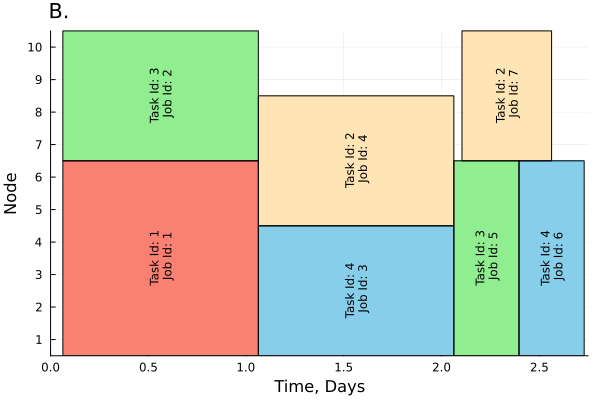

In [6]:

p2=plot_node_util(adaptive_all_arrive_same_time, ticks_step=0.5, annotation_pointsize=annotation_pointsize)
title!("B.", titleloc=:left)

#savefig("node_util2.svg")
#savefig("node_util2.pdf")


